In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import json
from matplotlib.patches import Patch

In [7]:
results_Ea = []
stdev_Ea = []
events_all = []


#Third index is bond event sequence pair
#0 - AA , 1 - AB , 2 - BB
events = np.array([0,0])
cnt = 0
barrier_path = './Stiff/'
for eps_val in ['*0.0epsAA_3.0epsAB_0.0epsBB*_v5.json','*3.0epsAA_0.0epsAB_3.0epsBB*_v5.json']:
    barfiles = sorted(glob.glob(barrier_path+eps_val))

    barAA_list = []
    barAB_list = []
    barBB_list = []

    for cntr, barfile in enumerate(barfiles):
        with open(barfile,'r') as f:
            record = json.load(f)
        barAA_list.append(np.array([i['energy']['total'] for i in record if i['type']==[2,2]]))
        barAB_list.append(np.array([i['energy']['total'] for i in record if i['type']==[2,3] or i['type']==[3,2]]))
        barBB_list.append(np.array([i['energy']['total'] for i in record if i['type']==[3,3]]))



    barAA=[val/3 for i in barAA_list for val in i]
    barAB=[val/3 for i in barAB_list for val in i]  
    barBB=[val/3 for i in barBB_list for val in i]
    events[cnt] += len(barAA)+len(barAB)+len(barBB)
    for entry in barAA:
        events_all.append(entry)
    for entry in barAB:
        events_all.append(entry)
    for entry in barBB:
        events_all.append(entry)


    barAA_avg = np.mean(np.array(barAA))
    barAA_std = np.std(np.array(barAA))
    barAB_avg = np.mean(np.array(barAB))
    barAB_std = np.std(np.array(barAB))
    barBB_avg = np.mean(np.array(barBB))
    barBB_std = np.std(np.array(barBB))

    results_Ea.append([barAA_avg,barAB_avg,barBB_avg])
    stdev_Ea.append([barAA_std,barAB_std,barBB_std])



Stiff events:
[59473     0]


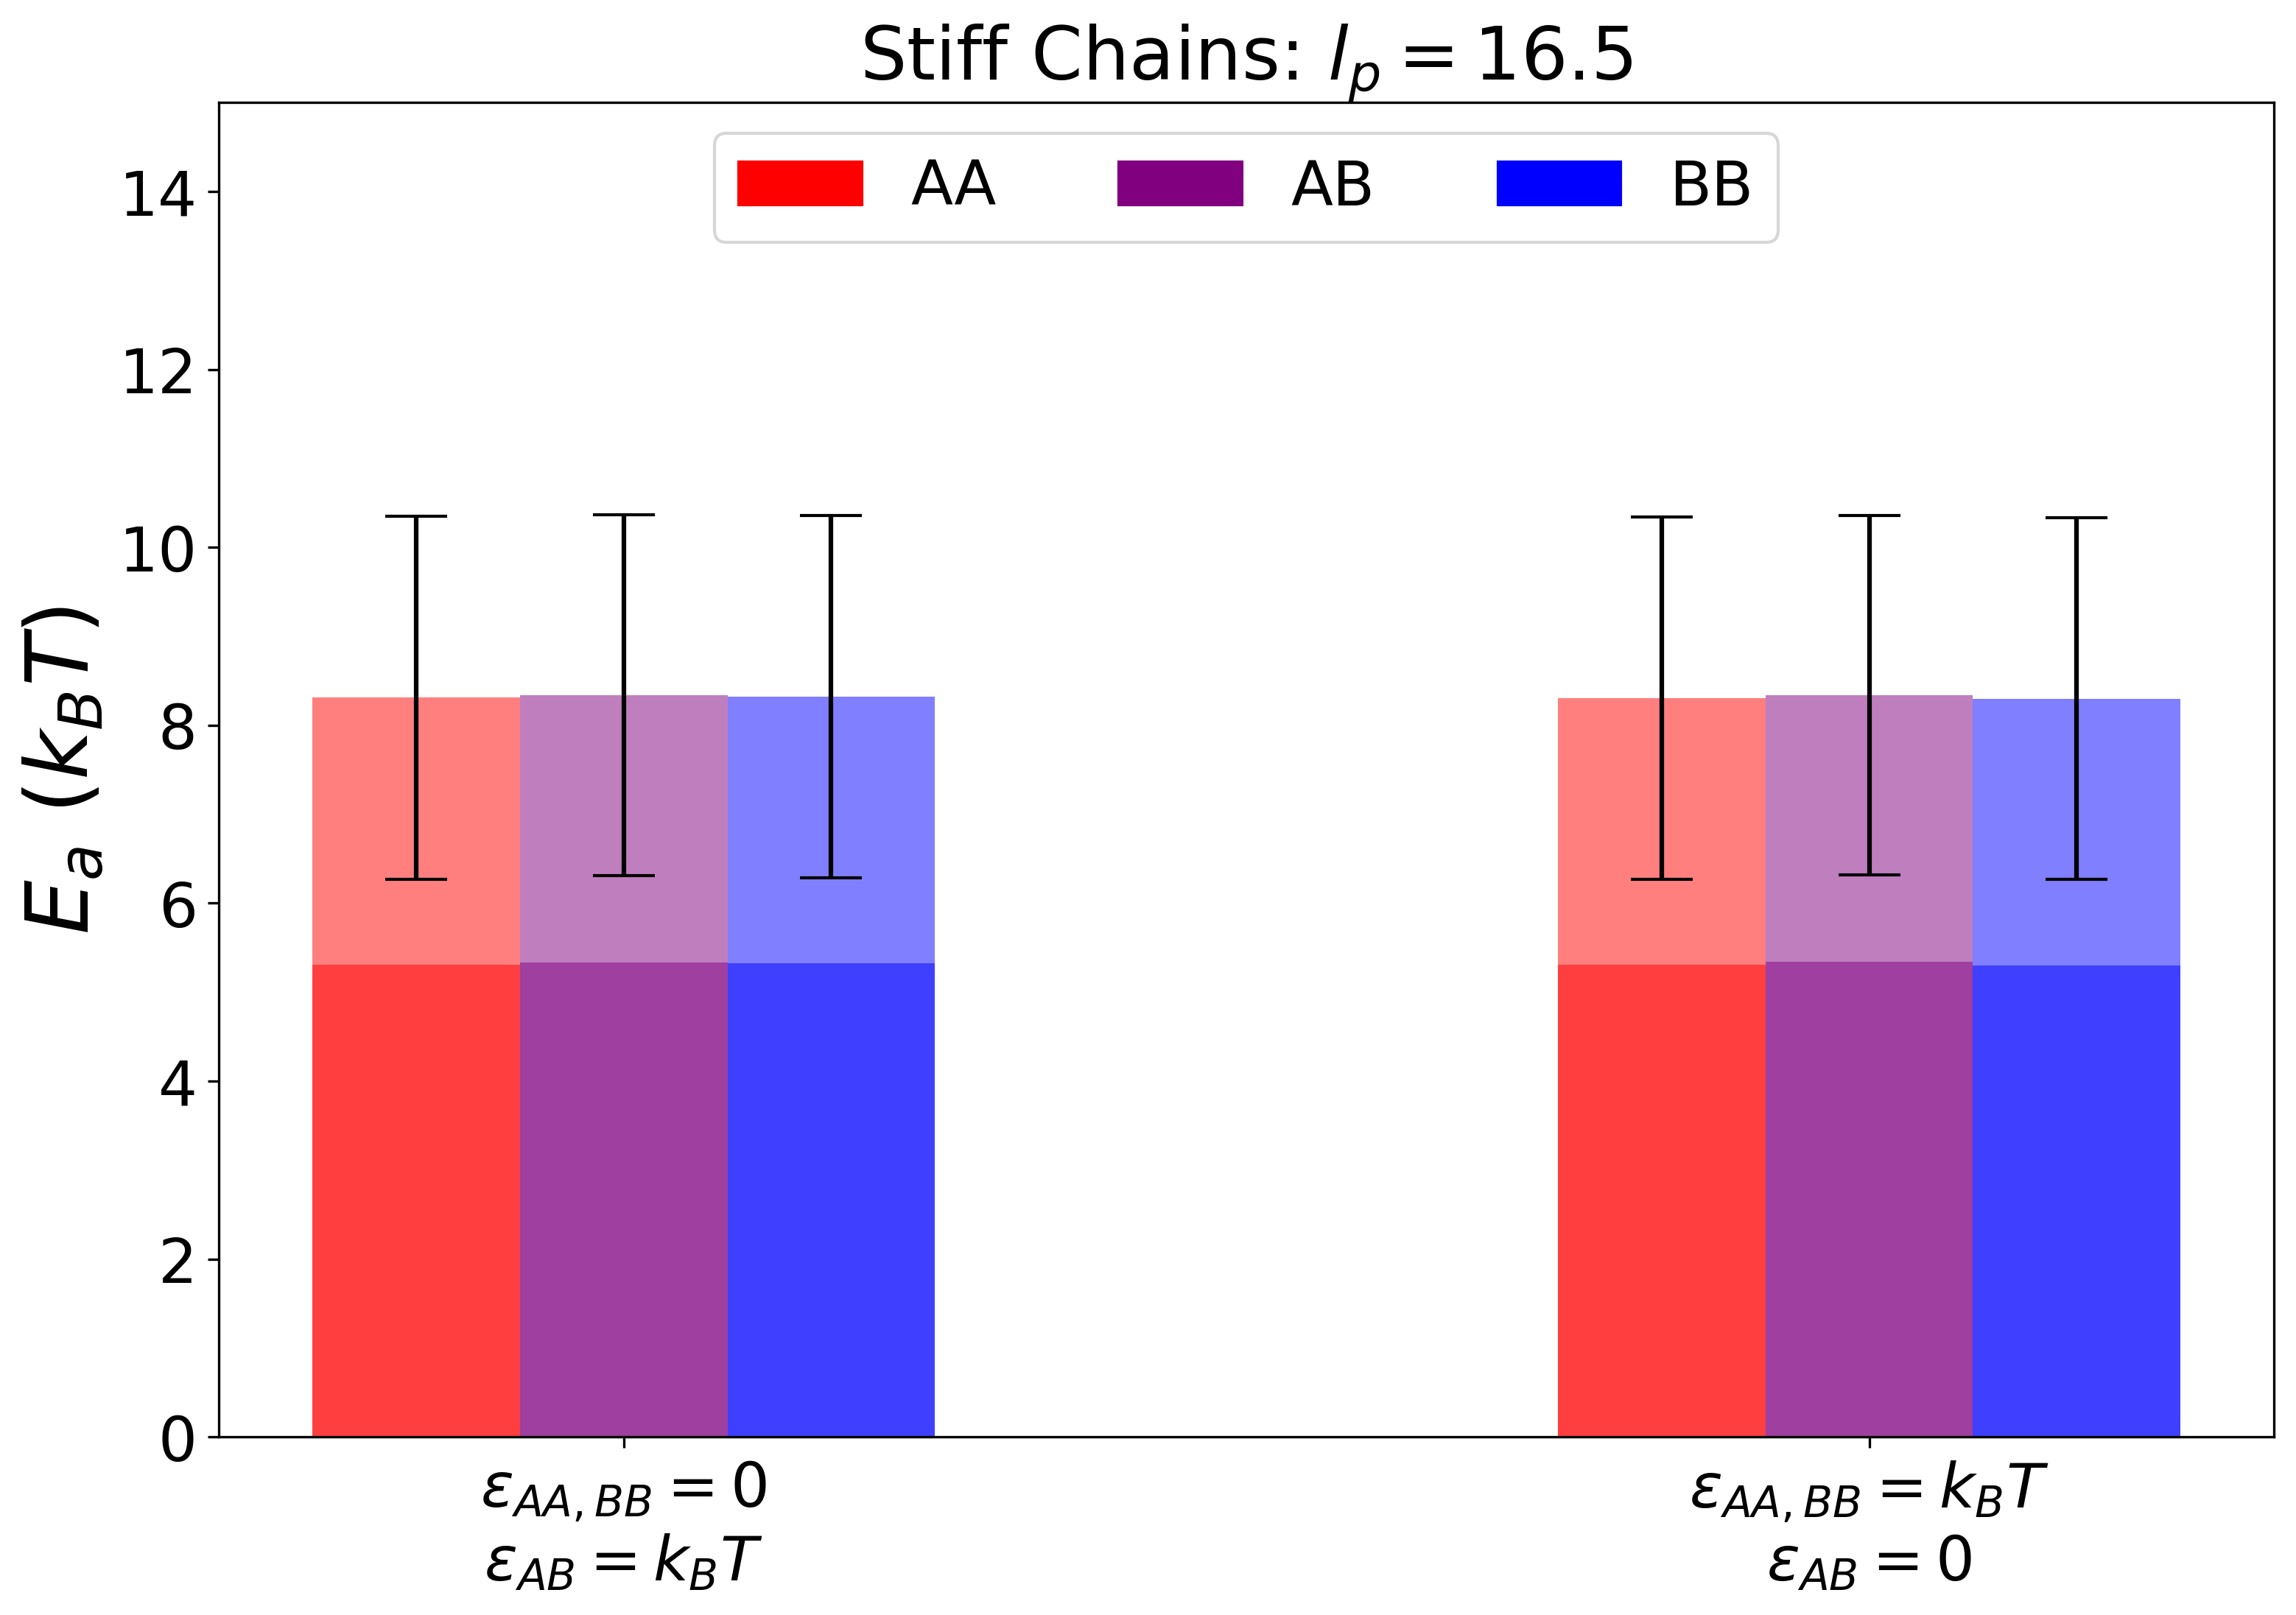

In [8]:
font = {'size':20}
matplotlib.rc('axes',labelsize=28)
matplotlib.rc('font',**font)
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams.update({'errorbar.capsize': 10})

titles = 'Stiff Chains: $l_p = 16.5$'

fig, ax = plt.subplots(1,1,figsize= (12,8))


ax.bar(0.5-(0.5/3),results_Ea[0][0]+3,width=0.5/3,yerr=stdev_Ea[0][0],color='r',alpha=0.5)
ax.bar(0.5,results_Ea[0][1]+3,width=0.5/3, yerr=stdev_Ea[0][1],color='purple',alpha=0.5)
ax.bar(0.5+(0.5/3),results_Ea[0][2]+3,width=0.5/3,yerr=stdev_Ea[0][2], color='b',alpha=0.5)

ax.bar(1.5-(0.5/3),results_Ea[1][0]+3,width=0.5/3,yerr=stdev_Ea[1][0],color='r',alpha=0.5)
ax.bar(1.5,results_Ea[1][1]+3,width=0.5/3, yerr=stdev_Ea[1][1],color='purple',alpha=0.5)
ax.bar(1.5+(0.5/3),results_Ea[1][2]+3,width=0.5/3,yerr=stdev_Ea[1][2], color='b',alpha=0.5)

# ax.bar(2-(0.5/3),results_Ea[2][0]+3,width=0.5/3,yerr=stdev_Ea[2][0],color='r',alpha=0.5)
# ax.bar(2,results_Ea[2][1]+3,width=0.5/3, yerr=stdev_Ea[2][1],color='purple',alpha=0.5)
# ax.bar(2+(0.5/3),results_Ea[2][2]+3,width=0.5/3,yerr=stdev_Ea[2][2], color='b',alpha=0.5)    


ax.bar(0.5-(0.5/3),results_Ea[0][0],width=0.5/3, color='r',alpha=0.5)
ax.bar(0.5,results_Ea[0][1],width=0.5/3, color='purple',alpha=0.5)
ax.bar(0.5+(0.5/3),results_Ea[0][2],width=0.5/3, color='b',alpha=0.5)

ax.bar(1.5-(0.5/3),results_Ea[1][0],width=0.5/3,color='r',alpha=0.5)
ax.bar(1.5,results_Ea[1][1],width=0.5/3,color='purple',alpha=0.5)
ax.bar(1.5+(0.5/3),results_Ea[1][2],width=0.5/3, color='b',alpha=0.5)

# ax.bar(2-(0.5/3),results_Ea[2][0],width=0.5/3,color='r',alpha=0.5)
# ax.bar(2,results_Ea[2][1],width=0.5/3,color='purple',alpha=0.5)
# ax.bar(2+(0.5/3),results_Ea[2][2],width=0.5/3, color='b',alpha=0.5)    



label1 = r'$\epsilon_{AA,BB} = 0$'+'\n'+'$\epsilon_{AB} = k_{B}T$'
label2 = r'$\epsilon_{AA,BB} = k_{B}T$'+'\n'+'$\epsilon_{AB} = 0$'
# label3 = r'$\epsilon_{AA,BB} = k_{B}T$'+'\n'+'$\epsilon_{AB} = k_{B}T$'

ax.set_xticks([0.5,1.5])
ax.set_xticklabels([label1,label2])
ax.set_ylim((0,15));
ax.set_title(titles)



legend_elements = [Patch(facecolor='r', edgecolor='r',label='AA'),Patch(facecolor='purple', edgecolor='purple',label='AB'),Patch(facecolor='b', edgecolor='b',label='BB')]
ax.legend(handles=legend_elements, loc='upper center', ncol=3)
ax.set_ylabel(r'$E_a \ (k_BT)$')

      
print('Stiff events:')
print(events)


fig.subplots_adjust(wspace=0.1)
plt.show()
#fig.savefig('copoly5_FigSI_ActivationEnergy.png',dpi=300, bbox_inches='tight')
fig.savefig('copoly3_FigSI_ActivationEnergy.png',dpi=300, bbox_inches='tight')

In [10]:
print(len(events_all))

59473


In [11]:
print(np.mean(events_all))

5.3206922130624825
